# Systemy uczące się - Zad. dom. 11: Algorytm oczekiwanie-maksymalizacja

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:

In [1]:
import numpy as np

NAME = "Bartłomiej Andree"
ID = "162961"

### Ćwiczenie 1 - implementacja k-means
Wygeneruj zbiór danych

Note: you may need to restart the kernel to use updated packages.


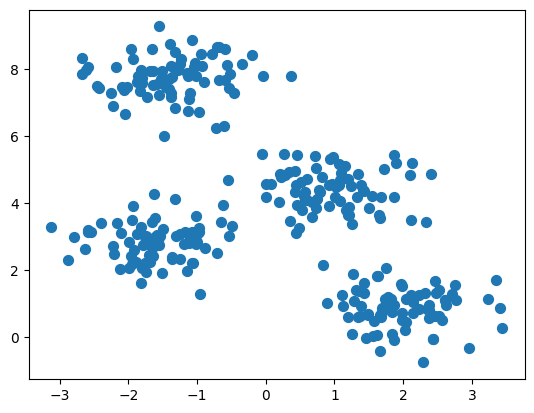

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
%pip install scikit-learn
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

Algorytm k-średnich, zaraz po inicjalizacji początkowych wartości centroidów, składa się z 2 podstawowych, powtarzanych iteracyjnie kroków:
- *expectation* - przypisanie każdego elementu zbiory danych do najbliższego centroidu
- *maximization* - aktualizacja centroidów. Centroid jest wyznaczany jako średnia arytmetyczna po wszystkich przypisanych do niego punktach

Zaimplementuj ten algorytm. W implementacji może być pomocna funkcja `pairwise_distances_argmin` [[dokumentacja]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html)

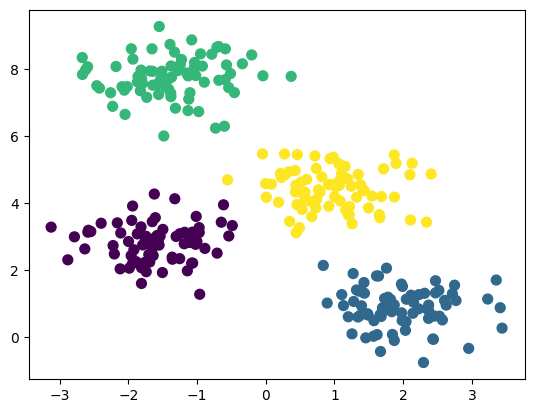

In [3]:
def find_clusters(x: np.ndarray, k: int) -> np.ndarray:
    """Znajduje skupienia algorytmem k-średnich
    
    Na wyjście zwracany jest wektor zawierający przypisania każdego elementu z x do skupienia
    np. [0,1,1] dla 3-elementowego X i k=2 oznacza że pierwszy element należy
    do grupy pierwszej, a element drugi i trzeci należą do grupy drugiej.
    
    Arguments:
        x (np.ndarray): zbiór danych
        k (int): liczba szukanych grup
        
    Returns:
        np.ndarray: wektor zawierający przypisania każdego elementu z x do skupienia   
    """
    
    # TODO: Zaimplementuj funkcję
    from sklearn.metrics import pairwise_distances_argmin
    
    # Liczba próbek, wymiar danych
    n_samples, n_features = x.shape
    
    # Losowo wybieramy k punktów z danych
    indices = np.random.choice(n_samples, k, replace=False)
    centroids = x[indices]
    
    # Iterujemy aż do zbieżności
    labels_old = np.zeros(n_samples)
    labels = np.zeros(n_samples)
    max_iterations = 100
    
    for i in range(max_iterations):
        # Przypisanie punktów do najbliższych centroidów
        labels = pairwise_distances_argmin(x, centroids)
        
        # Sprawdzenie zbieżności
        if np.all(labels == labels_old):
            break
        
        labels_old = labels.copy()
        
        # Aktualizacja centroidów
        for j in range(k):
            # Jeśli brak punktów w klastrze, zachowujemy poprzedni centroid
            if np.sum(labels == j) == 0:
                continue
            # Nowy centroid jako średnią punktów w klastrze
            centroids[j] = np.mean(x[labels == j], axis=0)
    
    return labels


labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Przetestuj działanie metody dla innych danych:
```
from sklearn.datasets import make_moons, make_circles
X, _ = make_moons(200, noise=.05, random_state=0)
```
oraz
```
X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
```
czy algorytm k-średnich potrafi je zgrupować w sposób zgodny z oczekiwaniami? Jakie rodzaje kształtów potrafi wykrywać algorytm k-średnich?


Algorytm k-means nie radzi sobie dobrze z grupowaniem danych o niekonwencjonalnych kształtach, takich jak półksiężyce czy okręgi. Jest to spowodowane fundamentalnym założeniem algorytmu, że skupiska są w przybliżeniu sferyczne/kuliste i równomiernie rozłożone w przestrzeni.

W przypadku zbiorów danych half-moons, algorytm dzieli dane na dwie grupy, ale nie według naturalnych kształtów półksiężyców, tylko wzdłuż linii prostej, która minimalizuje odległości euklidesowe do centroidów. W rezultacie obie grupy zawierają punkty z obu półksiężyców, co nie odpowiada intuicyjnemu podziałowi.

W przypadku zbiorów danych circles, algorytm dzieli dane na zewnętrzny i wewnętrzny okrąg, ale często nierównomiernie, dzieląc zewnętrzny okrąg na dwie części, lub łącząc części wewnętrznego i zewnętrznego okręgu. Nie jest w stanie wykryć koncentrycznych okręgów jako naturalnych skupisk.

Algorytm k-means dobrze wykrywa skupiska, które są:
- Sferyczne (kuliste)
- O podobnej wariancji
- O podobnej liczebności
- Dobrze odseparowane od siebie

Nie radzi sobie z:
- Skupiskami o złożonych kształtach
- Skupiskami o różnej gęstości
- Skupiskami o bardzo różnych wielkościach
- Skupiskami, które nie są liniowo separowalne

Przetesuj działanie profesjonalnej implementacji algorytm k-średnich z pakietu sklearn
```
from sklearn.cluster import KMeans
```
ponieważ problem jest nienadzorowany, funkcja `fit()` przyjmie tylko jeden argument (`X`). Liczbę grup możesz określić poprzez parametr konstruktora `n_clusters = 5`. Przypisanie obserwacji do poszczególnych grup możesz odczytać z włąściwości `labels_` wytrenowanego obiektu `KMeans`. Narysuj wynik grupowania.

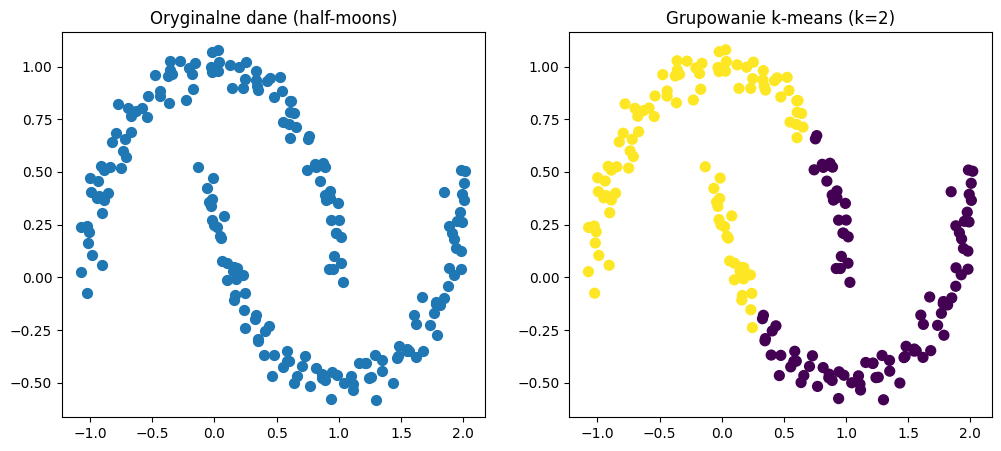

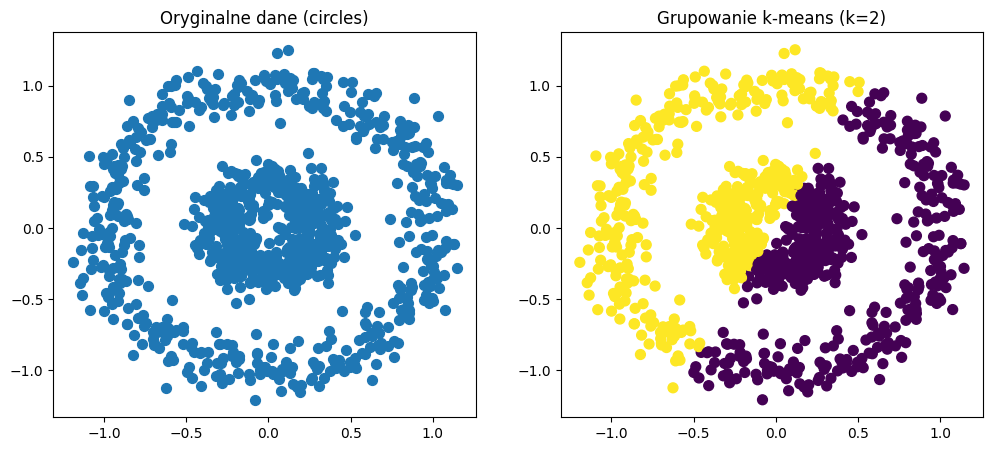

In [4]:
# TODO: wykonaj opisane testy
# half-moons
from sklearn.datasets import make_moons
X_moons, _ = make_moons(200, noise=.05, random_state=0)

# Wizualizacja
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Oryginalne dane (half-moons)")
plt.scatter(X_moons[:, 0], X_moons[:, 1], s=50)

# Grupowanie k-means (k=2)
plt.subplot(1, 2, 2)
plt.title("Grupowanie k-means (k=2)")
labels_moons = find_clusters(X_moons, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, s=50, cmap='viridis')
plt.show()

# circles
from sklearn.datasets import make_circles
X_circles, _ = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Wizualizacja
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Oryginalne dane (circles)")
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=50)

# Grupowanie k-means (k=2)
plt.subplot(1, 2, 2)
plt.title("Grupowanie k-means (k=2)")
labels_circles = find_clusters(X_circles, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, s=50, cmap='viridis')
plt.show()

O algorytmie k-średnich często mówi się, że wykrywa skupiska sferyczne.
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()```

Sprawdź tę hipotezę na podanych trudniejszych danych sferycznych (no właśnie czy są one sferyczne?). Czy nawet gdyby wybrać centroidy jako prawdziwe centra skupisk, otrzymalibyśmy prawidłowe grupowanie? Dlaczego?

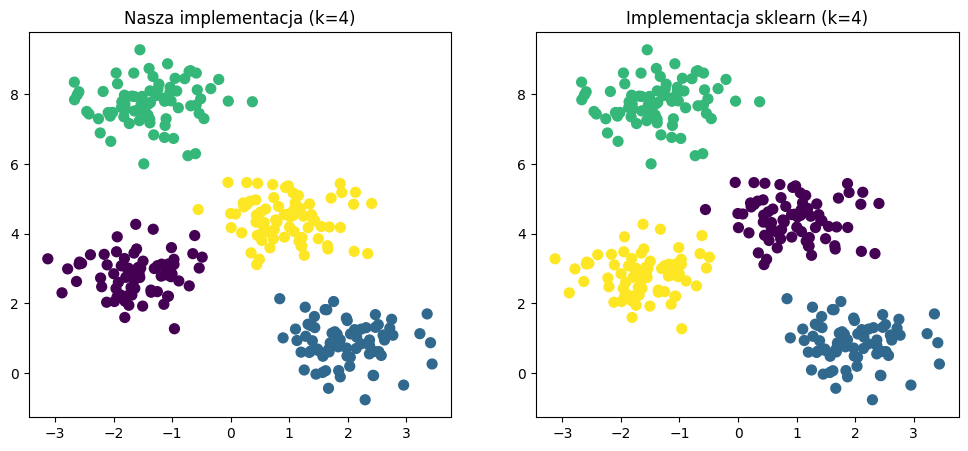

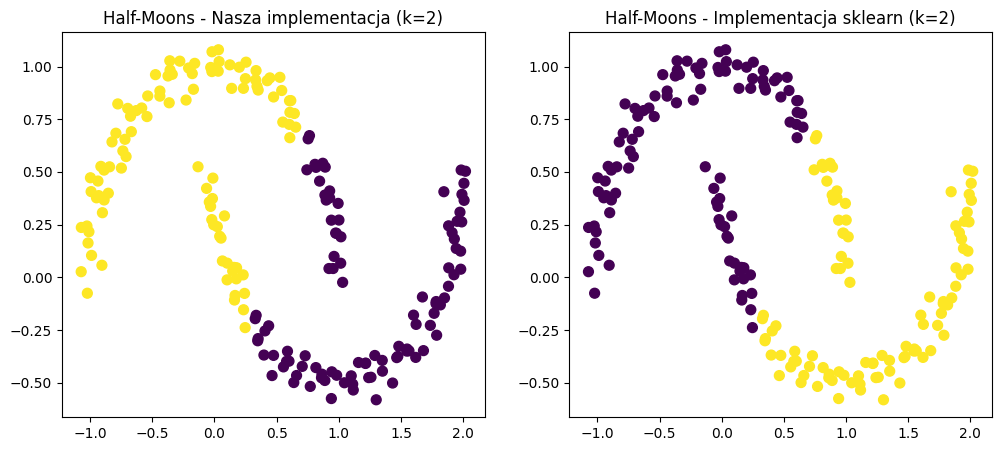

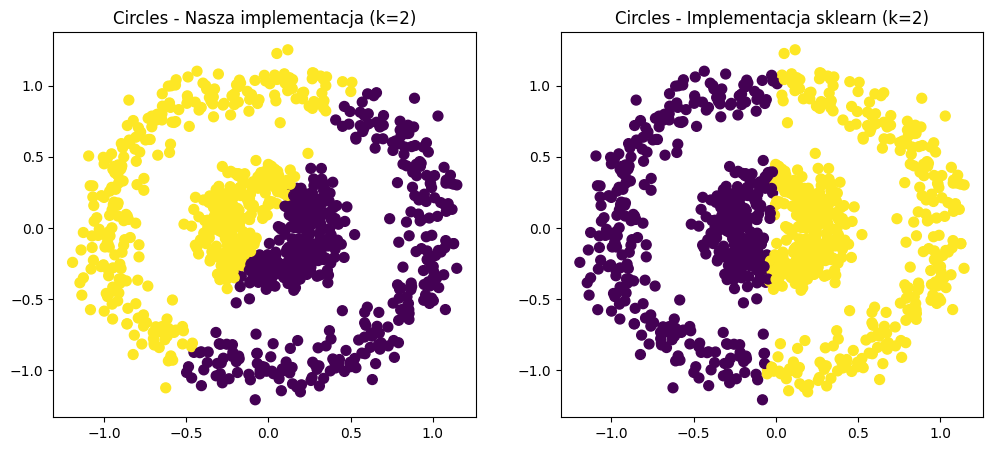

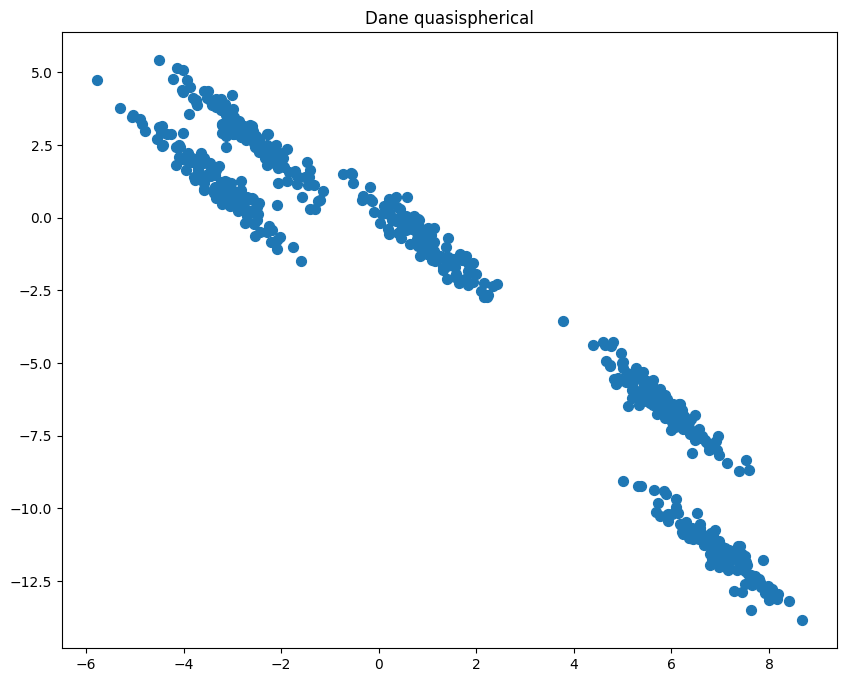

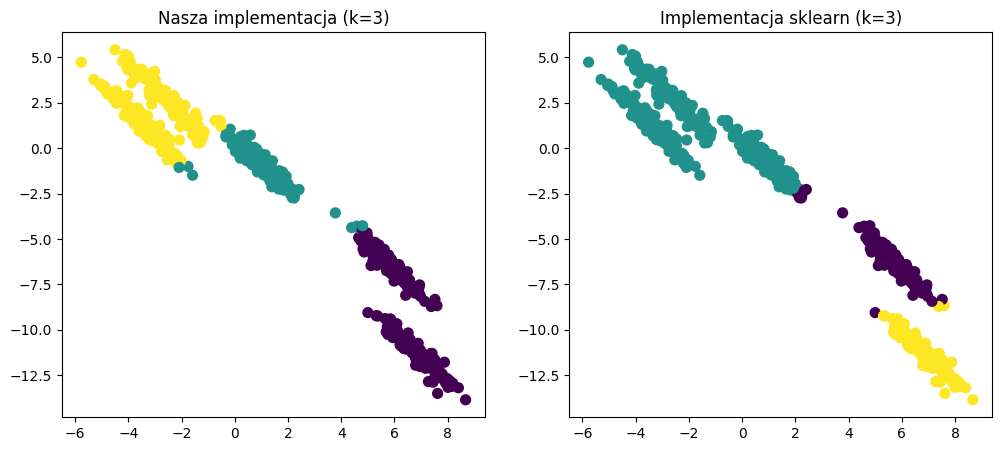

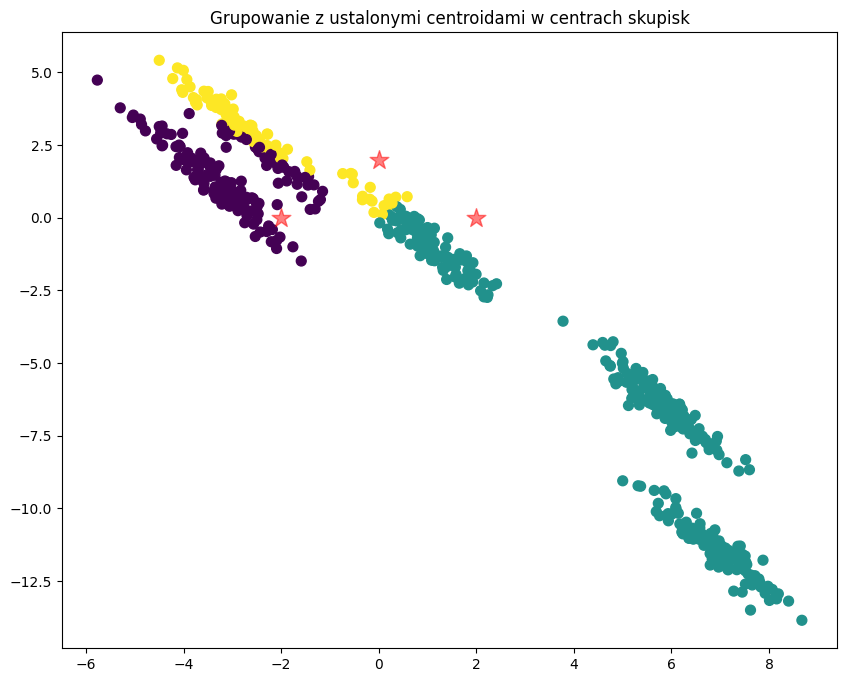

In [5]:
# TODO: wykonaj opisane testy
# Testujemy implementację z sklearn
from sklearn.cluster import KMeans

# Testowanie na oryginalnych danych
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels_sklearn = kmeans.labels_

# Porównanie wyników naszej implementacji i sklearn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Nasza implementacja (k=4)")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title("Implementacja sklearn (k=4)")
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, s=50, cmap='viridis')
plt.show()

# Testowanie na half-moons
kmeans_moons = KMeans(n_clusters=2, random_state=0)
kmeans_moons.fit(X_moons)
labels_moons_sklearn = kmeans_moons.labels_

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Half-Moons - Nasza implementacja (k=2)")
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, s=50, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title("Half-Moons - Implementacja sklearn (k=2)")
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons_sklearn, s=50, cmap='viridis')
plt.show()

# Testowanie na circles
kmeans_circles = KMeans(n_clusters=2, random_state=0)
kmeans_circles.fit(X_circles)
labels_circles_sklearn = kmeans_circles.labels_

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Circles - Nasza implementacja (k=2)")
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, s=50, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title("Circles - Implementacja sklearn (k=2)")
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles_sklearn, s=50, cmap='viridis')
plt.show()

# Wczytanie danych quasispherical
from helpers import get_quasispherical_data
X_quasi = get_quasispherical_data()

# Wizualizacja
plt.figure(figsize=(10, 8))
plt.title("Dane quasispherical")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], s=50)
plt.show()

# Grupowanie k-means z własnej implementacji
labels_quasi = find_clusters(X_quasi, 3)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Nasza implementacja (k=3)")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], c=labels_quasi, s=50, cmap='viridis')

# Porównanie z sklearn
kmeans_quasi = KMeans(n_clusters=3, random_state=0)
kmeans_quasi.fit(X_quasi)
labels_quasi_sklearn = kmeans_quasi.labels_

plt.subplot(1, 2, 2)
plt.title("Implementacja sklearn (k=3)")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], c=labels_quasi_sklearn, s=50, cmap='viridis')
plt.show()

# Test z centroidami w prawdziwych centrach skupisk
# Dla demonstracji użyjemy sztucznie ustawionych centroidów w środkach klastrów
# Załóżmy, że centra są mniej więcej w punktach: (-2, 0), (2, 0), (0, 2)
centers = np.array([[-2, 0], [2, 0], [0, 2]])
from sklearn.metrics import pairwise_distances_argmin

# Przypisujemy punkty do najbliższych centroidów
labels_fixed_centers = pairwise_distances_argmin(X_quasi, centers)

plt.figure(figsize=(10, 8))
plt.title("Grupowanie z ustalonymi centroidami w centrach skupisk")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], c=labels_fixed_centers, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='*')
plt.show()

Na podstawie testów można zauważyć, że dane quasispherical nie są idealnie sferyczne, lecz mają kształt eliptyczny lub wydłużony. Nawet przy idealnym wyborze centroidów w rzeczywistych środkach klastrów (oznaczonych czerwonymi gwiazdkami na ostatnim wykresie), algorytm k-means nie zawsze daje prawidłowe grupowanie.

Dzieje się tak, ponieważ k-means dzieli przestrzeń na obszary na podstawie odległości euklidesowej od centroidów, tworząc tzw. diagramy Voronoia. Jeśli skupiska są wydłużone, eliptyczne lub o nierównomiernej gęstości, to granica podziału wyznaczona przez algorytm k-means może przecinać rzeczywiste skupienie, przypisując część punktów należących do jednego naturalnego klastra do innego klastra.

W przypadku danych quasi-sferycznych widzimy, że niektóre punkty z jednego naturalnego klastra mogą być przypisane do innego klastra ze względu na ich odległość od centroidu, nawet jeśli centroidy są idealnie umieszczone. Jest to fundamentalne ograniczenie algorytmu k-means, który zakłada, że:
1. Skupiska mają zbliżony kształt i wielkość
2. Odległość euklidesowa jest odpowiednią miarą podobieństwa
3. Centroidy dobrze reprezentują swoje skupienia

Dlatego nawet przy idealnym wyborze centroidów możemy nie uzyskać prawidłowego grupowania dla danych, które odbiegają od założeń algorytmu.

**Ćwiczenia**
- Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o specyfice rozwiązowanego problemu i algortmie k-średnich jako algorytmie optymalizacyjnym?
- Twój algorytm uruchamiałeś z apriori znaną liczbą grup $k=4$, przetestuj działanie algorytmu dla $k=5$. Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o algortmie k-średnich jako algorytmie optymalizacyjnym?
- Jak w praktyce możemy próbować choć trochę ograniczyć problem algorytmu dot. utykania w minimach lokalnych?

**Odpowiedzi na pytania:**

1. **Czy za każdym razem dostajesz ten sam wynik?**
   Nie, za każdym uruchomieniem algorytmu k-means możemy otrzymać różne wyniki. Jest to spowodowane losową inicjalizacją centroidów. W zależności od wyboru początkowych centroidów, algorytm może konwergować do różnych minimów lokalnych funkcji kosztu.

2. **Co to mówi o specyfice rozwiązywania problemu i algorytmie k-średnich jako algorytmie optymalizacyjnym?**
   Algorytm k-means minimalizuje sumę kwadratów odległości punktów od ich centroidów. Jest to problem optymalizacyjny, który ma wiele minimów lokalnych. Algorytm k-means jest algorytmem zachłannym, który zawsze konwerguje do minimum lokalnego, ale niekoniecznie do globalnego. Oznacza to, że wynik grupowania może zależeć od początkowych warunków (inicjalizacji centroidów) i algorytm może "utknąć" w różnych minimach lokalnych, dając różne grupowania dla tych samych danych.

3. **Czy dla k=5 za każdym razem dostajesz ten sam wynik?**
   Dla k=5 (większego niż prawdziwa liczba klastrów w danych, która wynosi 4), różnice w wynikach poszczególnych uruchomień są jeszcze bardziej widoczne. Algorytm próbuje znaleźć 5 klastrów, mimo że naturalnie w danych występują 4 klastry. To powoduje, że jeden z naturalnych klastrów zostanie podzielony, a dokładny sposób podziału będzie zależał od inicjalizacji centroidów.

4. **Co to mówi o algorytmie k-średnich jako algorytmie optymalizacyjnym?**
   Pokazuje to, że algorytm k-means jest wrażliwy zarówno na inicjalizację, jak i na wybór parametru k. Gdy k jest większe niż rzeczywista liczba klastrów, problem ma jeszcze więcej możliwych minimów lokalnych, co zwiększa zmienność wyników. Algorytm zawsze dąży do minimalizacji funkcji kosztu, ale ta funkcja może mieć wiele minimów lokalnych o podobnych wartościach, co prowadzi do różnych grupowań.

5. **Jak w praktyce można ograniczyć problem utykania w minimach lokalnych?**
   W praktyce można stosować kilka strategii:
   - **Wielokrotne uruchomienie**: Uruchomienie algorytmu wiele razy z różnymi inicjalizacjami i wybranie najlepszego wyniku (o najniższej wartości funkcji kosztu).
   - **Lepsze metody inicjalizacji**: np. k-means++ zaimplementowany w sklearn, który wybiera początkowe centroidy w sposób, który zwiększa ich rozproszenie.
   - **Metody hierarchiczne**: Początkowo stosowanie większej liczby klastrów, a następnie łączenie podobnych.
   - **Anizotropowe metryki**: Stosowanie miar odległości, które lepiej pasują do kształtu danych.
   - **Strojenie parametru k**: Używanie metod takich jak metoda elbow method, silhouette coefficient lub kryterium informacyjne (BIC, AIC) do wybrania optymalnej liczby klastrów.
   - **Inne algorytmy grupowania**: Dla danych o złożonych kształtach można rozważyć inne metody, np. DBSCAN, Gaussian Mixture Models czy grupowanie spektralne.

## Zadanie 2 - parametry wielowymiarowego rozkładu normalnego

Poniższy kod służy do rysowania dwuwymiarowego rozkładu normalnego o wektorze średnich $[0,0]$ i macierzy kowariancji równej $[[1, 0], [0, 1]]$

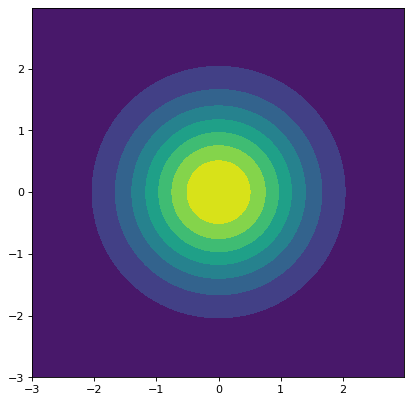

In [6]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmienisz wektor średnich  na np. $[1,0]$


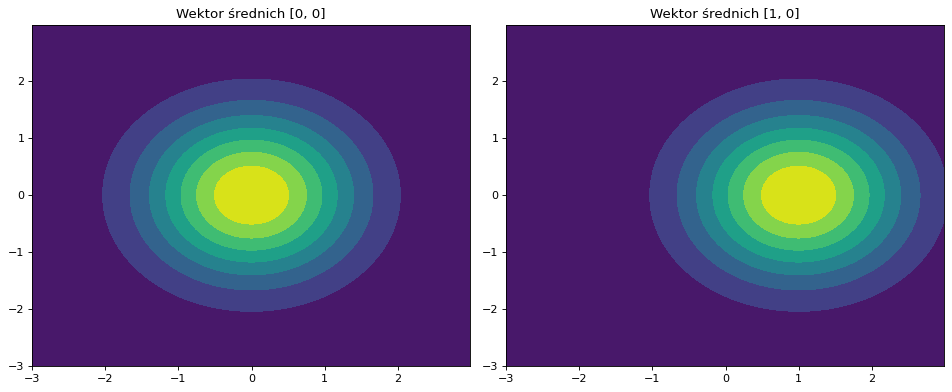

In [7]:
# TODO
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

figure(figsize=(12, 5), dpi=80)

# Oryginalny rozkład z wektorem średnich [0, 0]
plt.subplot(1, 2, 1)
plt.title('Wektor średnich [0, 0]')
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

# Rozkład z wektorem średnich [1, 0]
plt.subplot(1, 2, 2)
plt.title('Wektor średnich [1, 0]')
normal_shifted = multivariate_normal([1, 0], [[1, 0], [0, 1]])
densities_shifted = normal_shifted.pdf(points)
plt.contourf(x, y, densities_shifted)

plt.tight_layout()
plt.show()

# Zmiana wektora średnich powoduje przesunięcie rozkładu w przestrzeni
# bez zmiany jego kształtu. Jest to translacja rozkładu w kierunku nowego wektora średnich.

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na wielokrotność macierzy jednostkowej. (Warto wrócić do oryginalnego ustawienia wektora średnich, aby wycentrować wykres)

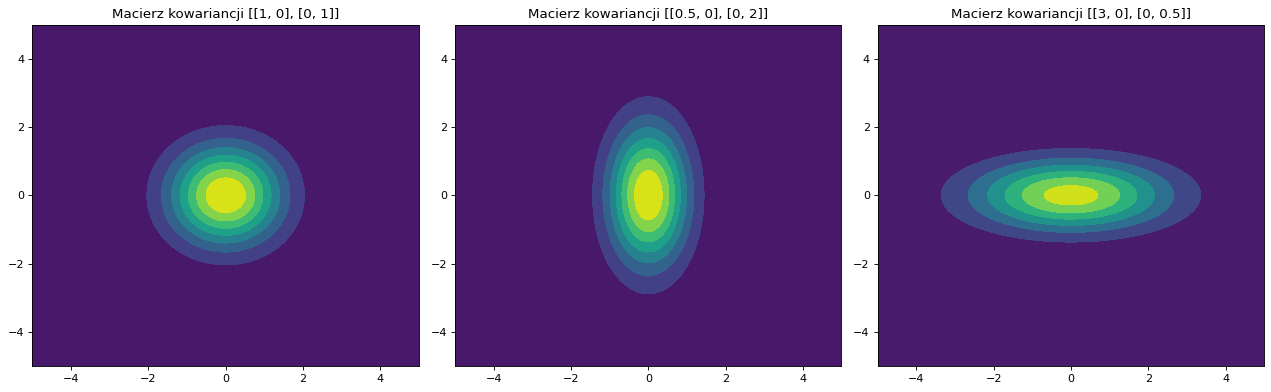

In [8]:
# TODO
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

figure(figsize=(16, 5), dpi=80)

# Oryginalny rozkład z macierzą kowariancji [[1, 0], [0, 1]]
plt.subplot(1, 3, 1)
plt.title('Macierz kowariancji [[1, 0], [0, 1]]')
x, y = np.mgrid[-5:5:.01, -5:5:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

# Rozkład z macierzą kowariancji [[0.5, 0], [0, 2]] (różne wartości na diagonali)
plt.subplot(1, 3, 2)
plt.title('Macierz kowariancji [[0.5, 0], [0, 2]]')
normal_diag1 = multivariate_normal([0, 0], [[0.5, 0], [0, 2]])
densities_diag1 = normal_diag1.pdf(points)
plt.contourf(x, y, densities_diag1)

# Rozkład z macierzą kowariancji [[3, 0], [0, 0.5]] (różne wartości na diagonali)
plt.subplot(1, 3, 3)
plt.title('Macierz kowariancji [[3, 0], [0, 0.5]]')
normal_diag2 = multivariate_normal([0, 0], [[3, 0], [0, 0.5]])
densities_diag2 = normal_diag2.pdf(points)
plt.contourf(x, y, densities_diag2)

plt.tight_layout()
plt.show()

# Zmiana macierzy kowariancji na inną macierz diagonalną powoduje zmianę kształtu
# rozkładu. Gdy wartości na diagonali są różne, rozkład ma kształt elipsoidy,
# której osie są równoległe do osi układu współrzędnych.
# Większa wartość na pierwszej pozycji diagonali oznacza większe rozproszenie
# w kierunku osi X, a większa wartość na drugiej pozycji - w kierunku osi Y.

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz diagonalną

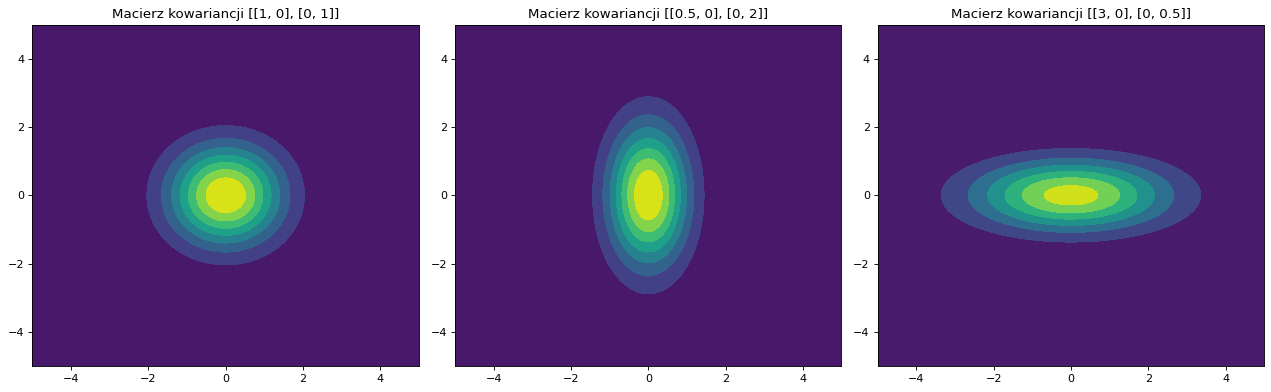

In [9]:
# TODO
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

figure(figsize=(16, 5), dpi=80)

# Oryginalny rozkład z macierzą kowariancji [[1, 0], [0, 1]]
plt.subplot(1, 3, 1)
plt.title('Macierz kowariancji [[1, 0], [0, 1]]')
x, y = np.mgrid[-5:5:.01, -5:5:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

# Rozkład z macierzą kowariancji [[0.5, 0], [0, 2]] (różne wartości na diagonali)
plt.subplot(1, 3, 2)
plt.title('Macierz kowariancji [[0.5, 0], [0, 2]]')
normal_diag1 = multivariate_normal([0, 0], [[0.5, 0], [0, 2]])
densities_diag1 = normal_diag1.pdf(points)
plt.contourf(x, y, densities_diag1)

# Rozkład z macierzą kowariancji [[3, 0], [0, 0.5]] (różne wartości na diagonali)
plt.subplot(1, 3, 3)
plt.title('Macierz kowariancji [[3, 0], [0, 0.5]]')
normal_diag2 = multivariate_normal([0, 0], [[3, 0], [0, 0.5]])
densities_diag2 = normal_diag2.pdf(points)
plt.contourf(x, y, densities_diag2)

plt.tight_layout()
plt.show()

# Zmiana macierzy kowariancji na inną macierz diagonalną powoduje zmianę kształtu
# rozkładu. Gdy wartości na diagonali są różne, rozkład ma kształt elipsoidy,
# której osie są równoległe do osi układu współrzędnych.
# Większa wartość na pierwszej pozycji diagonali oznacza większe rozproszenie
# w kierunku osi X, a większa wartość na drugiej pozycji - w kierunku osi Y.

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz symetryczną np. $[[1, 0.9], [0.9, 1]]$

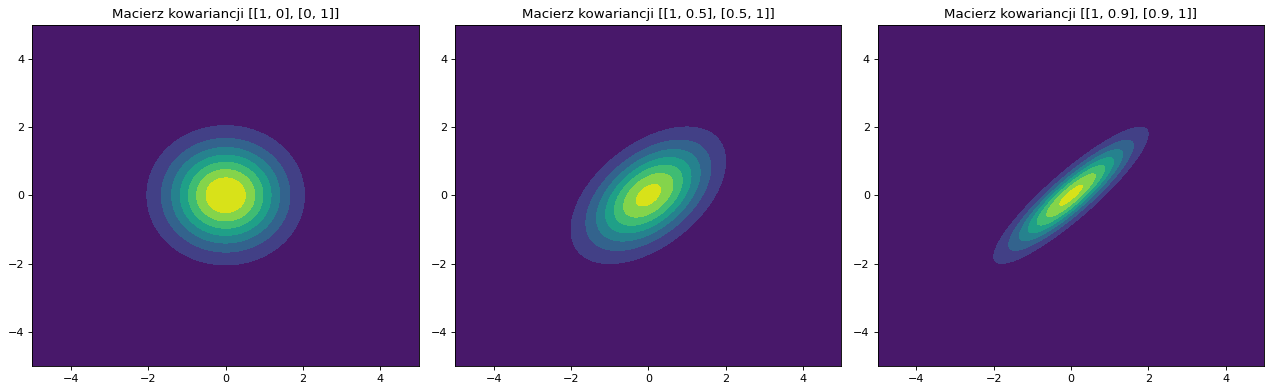

In [10]:
# TODO
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

figure(figsize=(16, 5), dpi=80)

# Oryginalny rozkład z macierzą kowariancji [[1, 0], [0, 1]]
plt.subplot(1, 3, 1)
plt.title('Macierz kowariancji [[1, 0], [0, 1]]')
x, y = np.mgrid[-5:5:.01, -5:5:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

# Rozkład z macierzą kowariancji [[1, 0.5], [0.5, 1]] (umiarkowana korelacja)
plt.subplot(1, 3, 2)
plt.title('Macierz kowariancji [[1, 0.5], [0.5, 1]]')
normal_corr1 = multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]])
densities_corr1 = normal_corr1.pdf(points)
plt.contourf(x, y, densities_corr1)

# Rozkład z macierzą kowariancji [[1, 0.9], [0.9, 1]] (silna korelacja)
plt.subplot(1, 3, 3)
plt.title('Macierz kowariancji [[1, 0.9], [0.9, 1]]')
normal_corr2 = multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]])
densities_corr2 = normal_corr2.pdf(points)
plt.contourf(x, y, densities_corr2)

plt.tight_layout()
plt.show()

# Wprowadzenie niezerowych wartości poza diagonalą powoduje, że główne osie
# elipsoidy rozkładu nie są już równoległe do osi układu współrzędnych.
# Wartości te reprezentują korelację między zmiennymi - im wyższe wartości 
# (bliższe 1 dla dodatniej korelacji lub -1 dla ujemnej korelacji),
# tym silniejsza korelacja i tym bardziej rozkład jest "obrócony" względem
# osi układu współrzędnych. Elipsoida jest wówczas pochylona wzdłuż linii 
# dodatniego (lub ujemnego) nachylenia.

Macierz kowariancji musi być symetryczna, jednak sama własność symetryczności macierzy nie wystarcza. Spróbuj zwizualizować rozkład o macierzy $[[1, 1], [1, 1]]$. Dlaczego nie jest to możliwe? Wyjaśnij używając zarówno formalizmu matematycznego jak i intuicji. (Jak wyglądałby wykres takiego rozkładu?)

In [11]:
# TODO
# Próba utworzenia rozkładu z osobliwą macierzą kowariancji [[1, 1], [1, 1]]
try:
    singular_normal = multivariate_normal([0, 0], [[1, 1], [1, 1]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    points = np.dstack((x, y))
    densities = singular_normal.pdf(points)
    plt.contourf(x, y, densities)
except np.linalg.LinAlgError as e:
    print("Ex:", e)

# Wyjaśnienie matematyczne:
# Macierz kowariancji musi być dodatnio określona (lub co najmniej półokreślona dodatnio),
# co oznacza, że wszystkie jej wartości własne muszą być dodatnie (lub nieujemne).
# 
# Dla macierzy [[1, 1], [1, 1]] wartości własne to:
# - λ₁ = 2 (dodatnia)
# - λ₂ = 0 (zerowa)
#
# Zerowa wartość własna oznacza, że macierz jest osobliwa (nie jest odwracalna),
# a więc jej wyznacznik wynosi 0: det([[1, 1], [1, 1]]) = 1*1 - 1*1 = 0.
#
# W kontekście wielowymiarowego rozkładu normalnego, funkcja gęstości prawdopodobieństwa
# zawiera odwrotność macierzy kowariancji oraz jej wyznacznik w mianowniku:
# f(x) = (1/((2π)^(k/2) * |Σ|^(1/2))) * exp(-0.5 * (x-μ)^T * Σ^(-1) * (x-μ))
#
# Gdy macierz jest osobliwa, nie można obliczyć jej odwrotności ani pierwiastka z wyznacznika.
#
# Interpretacja geometryczna:
# Macierz [[1, 1], [1, 1]] reprezentuje idealną korelację między zmiennymi (r=1),
# co oznacza, że wszystkie punkty rozkładu leżą dokładnie na linii prostej y = x.
# Rozkład ma zerową wariancję w kierunku prostopadłym do tej linii.
# Geometrycznie, elipsa rozkładu normalnego zdegenerowała się do odcinka linii prostej,
# co nie jest prawidłowym dwuwymiarowym rozkładem prawdopodobieństwa.
# Taka dystrybuanta nie całkowałaby się do 1 w przestrzeni dwuwymiarowej.

Ex: When `allow_singular is False`, the input matrix must be symmetric positive definite.


Korzystając z funkcji `multivariate_normal`, zwizualizuj mieszaninę dwóch rozkładów normalnych:
$$P(x) = \tau N(x; \mu_1, \Sigma_1) + (1-\tau) N(x; \mu_2, \Sigma_2) $$

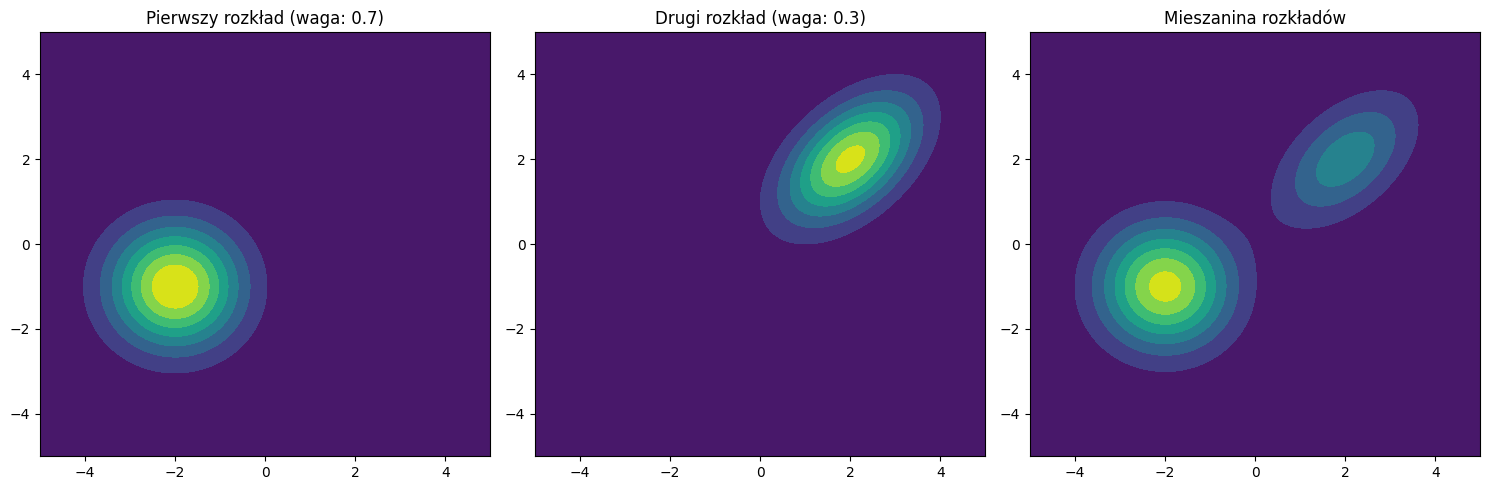

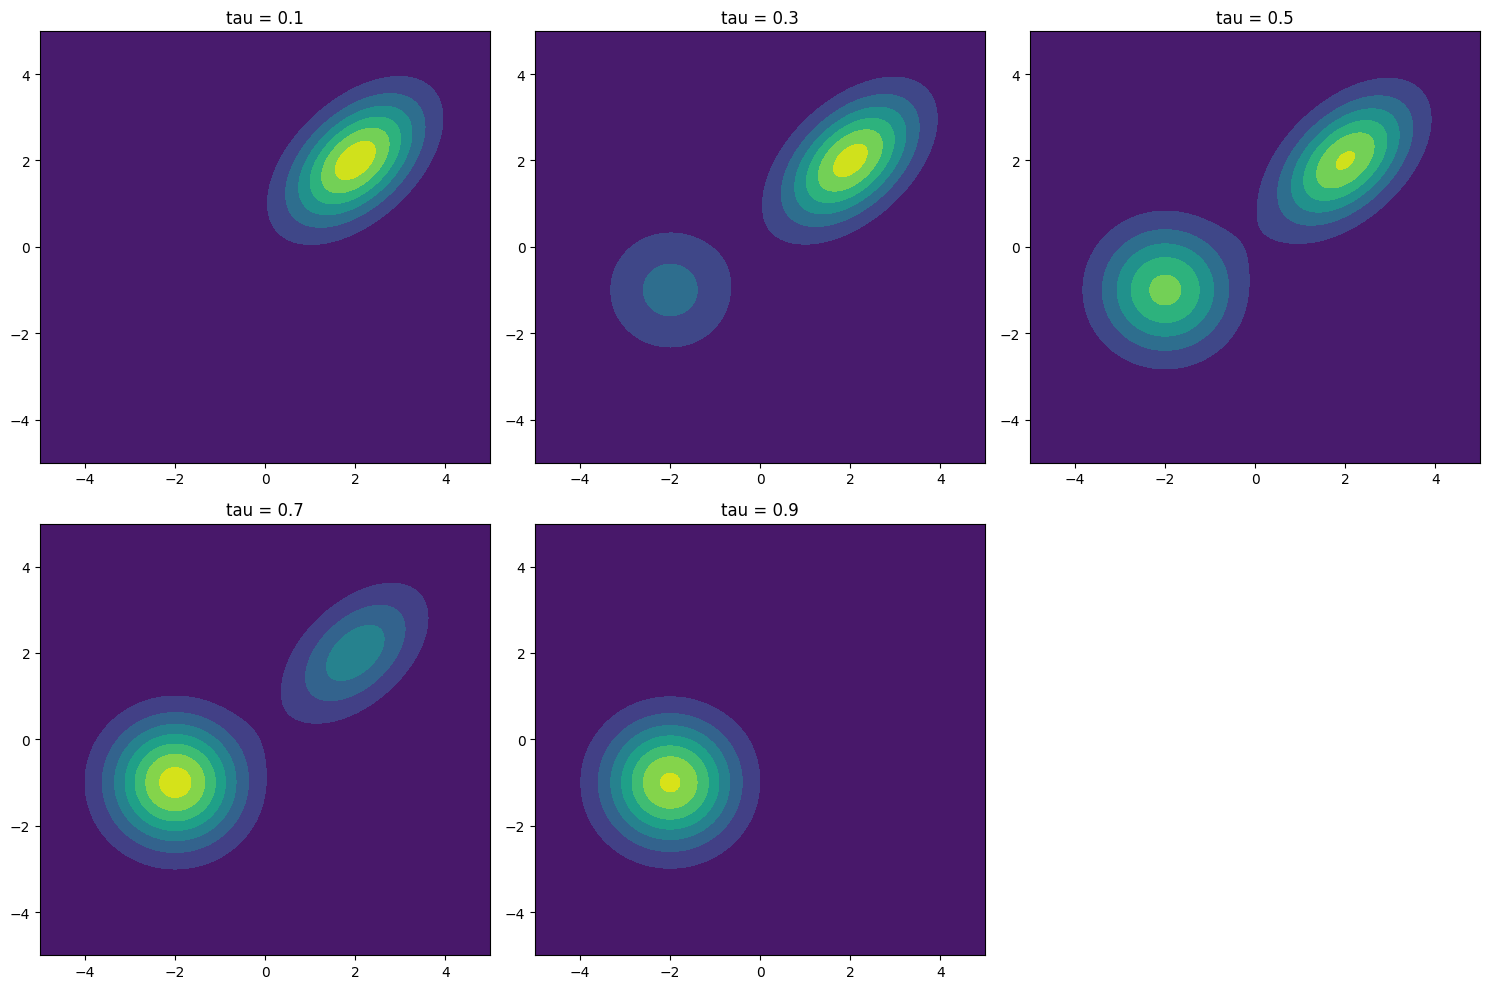

In [12]:
# TODO
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# Funkcja do obliczenia gęstości mieszaniny rozkładów
def mixture_pdf(points, tau, mu1, sigma1, mu2, sigma2):
    dist1 = multivariate_normal(mu1, sigma1)
    dist2 = multivariate_normal(mu2, sigma2)
    return tau * dist1.pdf(points) + (1 - tau) * dist2.pdf(points)

# Siatka punktów
x, y = np.mgrid[-5:5:.01, -5:5:.01]
points = np.dstack((x, y))

# Parametry mieszaniny
tau = 0.7  # waga pierwszego rozkładu
mu1 = [-2, -1]  # średnia pierwszego rozkładu
sigma1 = [[1, 0], [0, 1]]  # kowariancja pierwszego rozkładu
mu2 = [2, 2]  # średnia drugiego rozkładu
sigma2 = [[1, 0.5], [0.5, 1]]  # kowariancja drugiego rozkładu

# Obliczenie gęstości dla mieszaniny
mixture_densities = mixture_pdf(points, tau, mu1, sigma1, mu2, sigma2)

# Wizualizacja
plt.figure(figsize=(15, 5))

# Pierwszy rozkład
plt.subplot(1, 3, 1)
plt.title(f'Pierwszy rozkład (waga: {tau:.1f})')
dist1 = multivariate_normal(mu1, sigma1)
plt.contourf(x, y, dist1.pdf(points))

# Drugi rozkład
plt.subplot(1, 3, 2)
plt.title(f'Drugi rozkład (waga: {1-tau:.1f})')
dist2 = multivariate_normal(mu2, sigma2)
plt.contourf(x, y, dist2.pdf(points))

# Mieszanina
plt.subplot(1, 3, 3)
plt.title('Mieszanina rozkładów')
plt.contourf(x, y, mixture_densities)

plt.tight_layout()
plt.show()

# Wizualizacja mieszanin z różnymi wartościami tau
plt.figure(figsize=(15, 10))

for i, t in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
    plt.subplot(2, 3, i+1)
    plt.title(f'tau = {t:.1f}')
    mix = mixture_pdf(points, t, mu1, sigma1, mu2, sigma2)
    plt.contourf(x, y, mix)

plt.tight_layout()
plt.show()

**Ćwiczenia**
1. Poeksperymentuj z różnymi ustawieniami mieszaniny. Na co wpływa parametr $\tau$?
2. Rozważając mieszaninę rozkładów normalnych o dowolnej liczbie komponentów - czy istnieją rozkłady, których nie można zamodelować? Odpowiedź uzasadnij używając zdobytych intuicji.

**Odpowiedzi na pytania:**

1. **Na co wpływa parametr τ?**
   
   Parametr τ (tau) to waga pierwszego komponentu w mieszaninie rozkładów, czyli proporcja, z jaką pierwszy rozkład normalny przyczynia się do całkowitej mieszaniny. Odpowiednio (1-τ) to waga drugiego komponentu.
   
   - Kiedy τ = 1, mieszanina staje się po prostu pierwszym rozkładem normalnym.
   - Kiedy τ = 0, mieszanina staje się drugim rozkładem normalnym.
   - Dla wartości pośrednich, τ określa względny "udział" każdego z komponentów w ostatecznym rozkładzie.
   
   Na wizualizacjach widać, jak dla różnych wartości τ zmienia się kształt mieszaniny - w miejscach, gdzie dominuje komponent o większej wadze, gęstość prawdopodobieństwa jest większa.
   
2. **Czy istnieją rozkłady, których nie można zamodelować mieszaniną rozkładów normalnych?**
   
   Teoretycznie, przy odpowiednio dużej liczbie komponentów mieszaniny, można aproksymować dowolny ciągły rozkład prawdopodobieństwa z dowolną dokładnością. Jest to konsekwencją twierdzenia o uniwersalnej aproksymacji. Jednak w praktyce istnieją pewne ograniczenia:
   
   - **Rozkłady z nieciągłościami**: Mieszanina rozkładów normalnych jest zawsze ciągła, więc nie może idealnie odwzorować rozkładów z punktami nieciągłości.
   
   - **Rozkłady o ciężkich ogonach**: Rozkłady takie jak rozkład Cauchy'ego, które mają bardzo "ciężkie ogony" (gdzie prawdopodobieństwo wystąpienia wartości odległych od średniej jest znacznie większe niż w rozkładzie normalnym), są trudne do dokładnego zamodelowania za pomocą skończonej liczby komponentów normalnych.
   
   - **Rozkłady z ostrymi szczytami**: Rozkłady z bardzo ostrymi szczytami (jak rozkład Laplace'a) wymagają dużej liczby komponentów do dokładnej aproksymacji.
   
   - **Rozkłady o złożonej strukturze przestrzennej**: Rozkłady z wieloma lokalnymi maksimami, wzorami fraktalnymi lub osobliwościami wymagałyby bardzo dużej liczby komponentów.
   
   W praktyce jednak mieszaniny rozkładów normalnych są niezwykle elastyczne i mogą aproksymować większość rozkładów występujących w rzeczywistych danych z wystarczającą dokładnością, jeśli użyje się odpowiedniej liczby komponentów.

## Zadanie 3 - EM dla mieszaniny jednowymiarowej
Dane są dane wygenerowane z poniższej mieszaniny rozkładów normalnych:

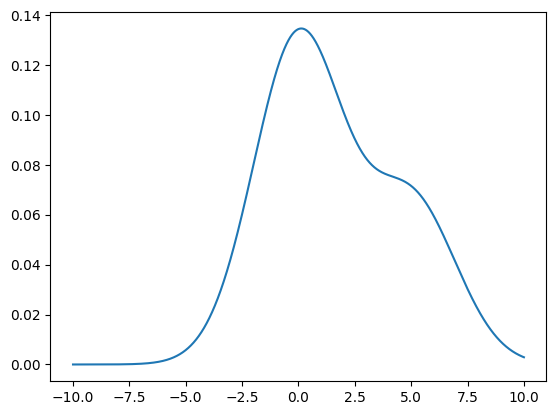

In [13]:
from scipy.stats import norm

x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, 0.66 * norm.pdf(x_axis, 0, 2) + 0.33 * norm.pdf(x_axis, 5, 2))
plt.show()

data = np.concatenate((np.random.normal(0, 2, 66), np.random.normal(5, 2, 33)))

Zwizualizuj dane na histogramie. Zwróć uwagę, że dobór odpowiednich $\mu_1, \mu_2, \sigma_1, \sigma_2$ na podstawie danych nie jest oczywisty

(array([ 2., 12., 13., 21., 13., 11., 10., 10.,  4.,  3.]),
 array([-4.70415809, -3.32378779, -1.9434175 , -0.56304721,  0.81732308,
         2.19769337,  3.57806366,  4.95843395,  6.33880424,  7.71917453,
         9.09954482]),
 <BarContainer object of 10 artists>)

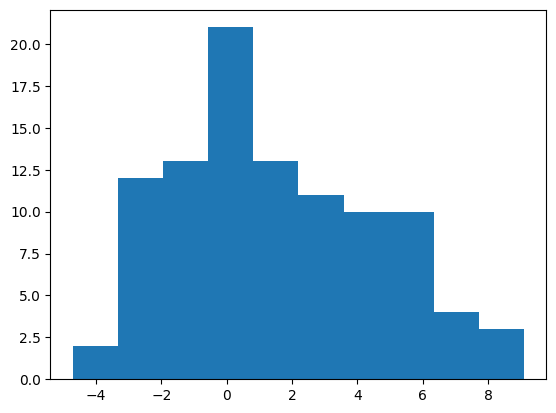

In [14]:
plt.hist(data)

Zaimplementuj algorytm EM dla powyższego problemu. Zwizualizuj kolejne kroki algorytmu (tj. narysuj wykres mikstury co kilka iteracji)

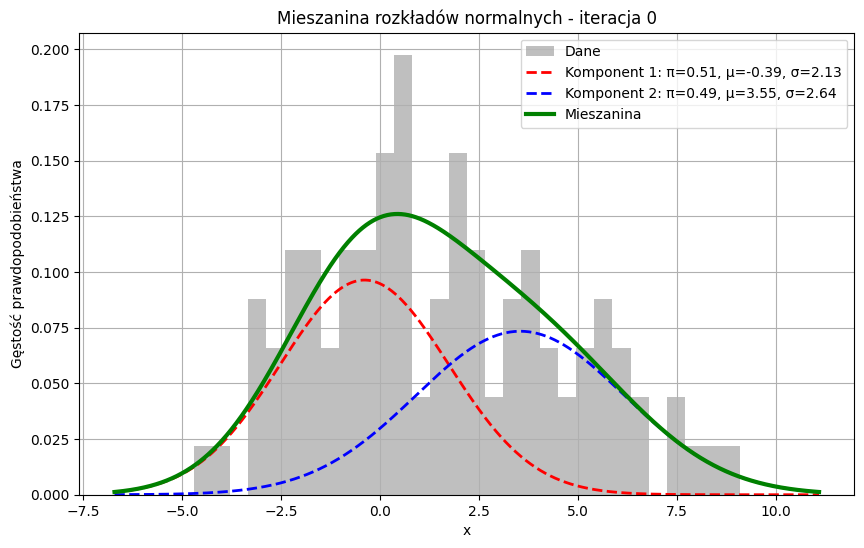

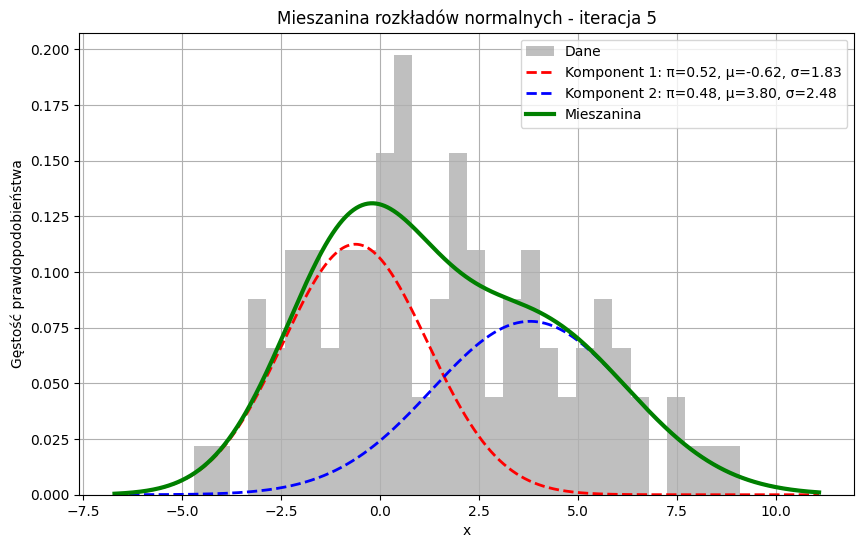

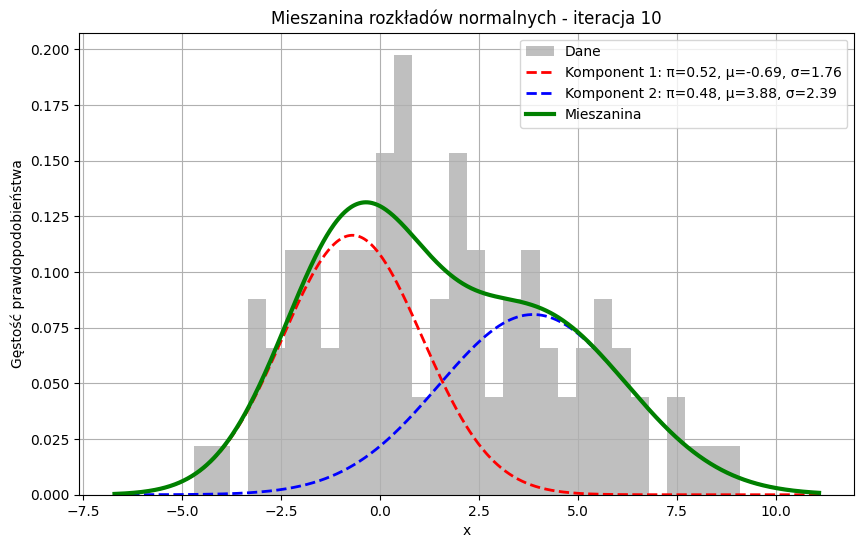

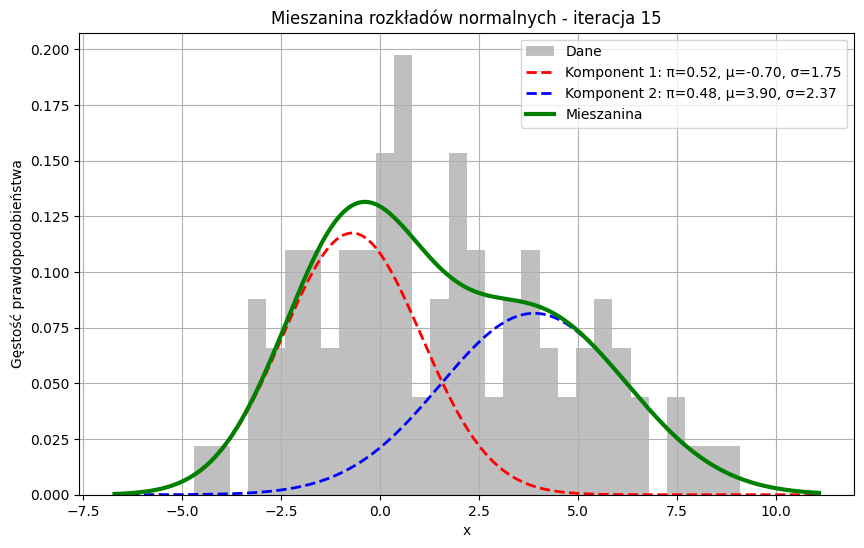

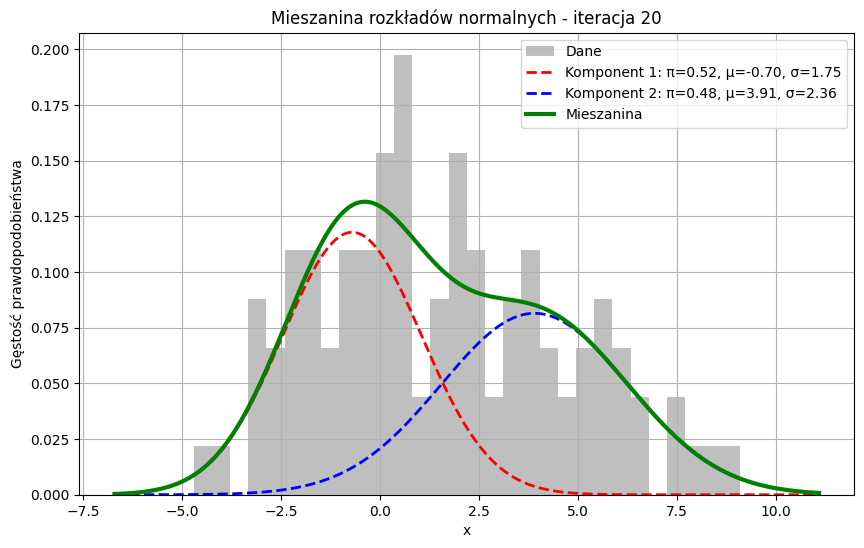

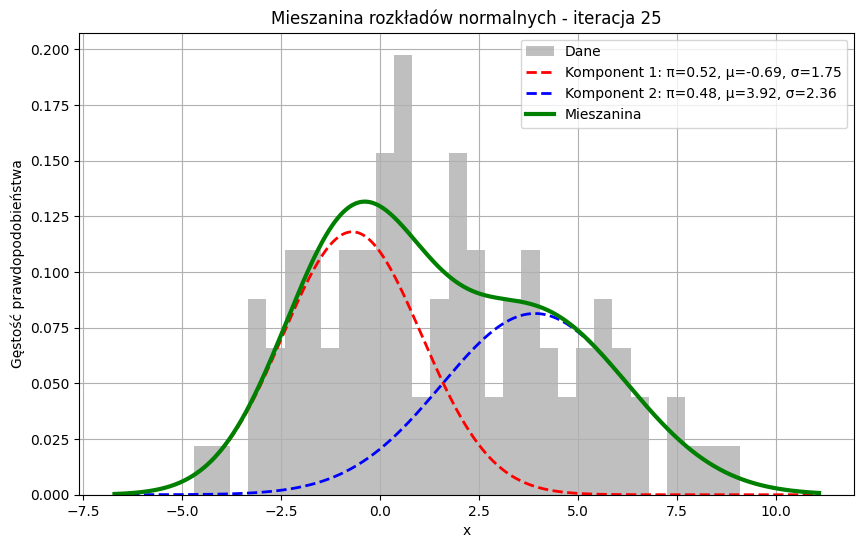

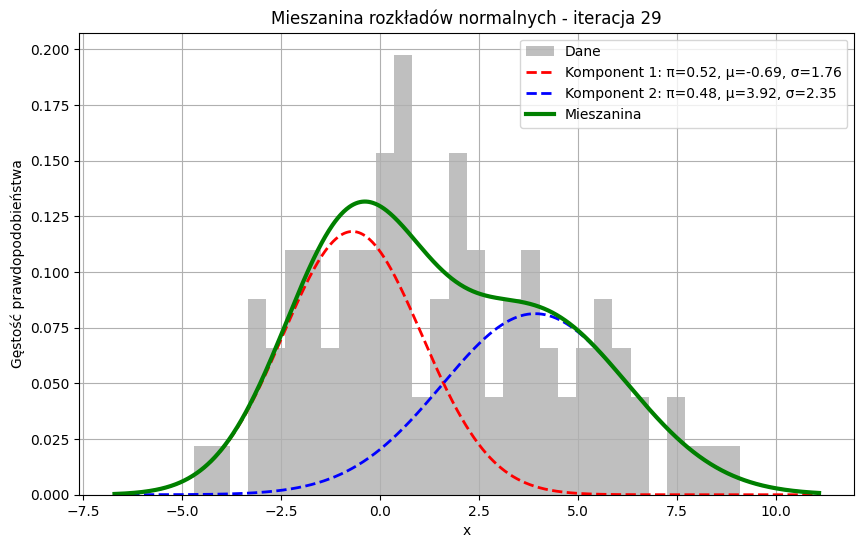

Parametry modelu po zbieżności:
π = [0.52020115 0.47979885]
μ = [-0.69153483  3.92428692]
σ = [1.75573355 2.35439462]
Log-wiarygodność = -248.7541295913611

Oryginalne parametry:
π = [0.66, 0.33]
μ = [0, 5]
σ = [2, 2]


In [15]:
# TODO
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Funkcja do wizualizacji mieszaniny
def plot_mixture(data, pi, mu, sigma, iteration=None):
    x_grid = np.linspace(np.min(data) - 2, np.max(data) + 2, 1000)
    plt.figure(figsize=(10, 6))
    
    # Histogram danych
    plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Dane')
    
    # Komponenty mieszaniny
    plt.plot(x_grid, pi[0] * norm.pdf(x_grid, mu[0], sigma[0]), 'r--', 
             linewidth=2, label=f'Komponent 1: π={pi[0]:.2f}, μ={mu[0]:.2f}, σ={sigma[0]:.2f}')
    plt.plot(x_grid, pi[1] * norm.pdf(x_grid, mu[1], sigma[1]), 'b--', 
             linewidth=2, label=f'Komponent 2: π={pi[1]:.2f}, μ={mu[1]:.2f}, σ={sigma[1]:.2f}')
    
    # Całkowita mieszanina
    mixture = pi[0] * norm.pdf(x_grid, mu[0], sigma[0]) + pi[1] * norm.pdf(x_grid, mu[1], sigma[1])
    plt.plot(x_grid, mixture, 'g-', linewidth=3, label='Mieszanina')
    
    if iteration is not None:
        plt.title(f'Mieszanina rozkładów normalnych - iteracja {iteration}')
    else:
        plt.title('Mieszanina rozkładów normalnych')
    
    plt.xlabel('x')
    plt.ylabel('Gęstość prawdopodobieństwa')
    plt.legend()
    plt.grid(True)
    plt.show()

# Implementacja algorytmu EM dla mieszaniny dwóch rozkładów normalnych
def em_gaussian_mixture(data, max_iter=100, tol=1e-6, verbose=True):
    n_samples = len(data)
    
    # Inicjalizacja parametrów
    # Prosta heurestyka do inicjalizacji
    # Wybieramy dwa różne punkty jako początkowe średnie
    pi = np.array([0.5, 0.5])  # Wagi komponentów
    mu = np.array([np.mean(data) - np.std(data), np.mean(data) + np.std(data)])  # Średnie
    sigma = np.array([np.std(data), np.std(data)])  # Odchylenia standardowe
    
    log_likelihood_old = -np.inf
    
    for iteration in range(max_iter):
        # Odpowiedzialności
        resp = np.zeros((n_samples, 2))
        
        for k in range(2):
            resp[:, k] = pi[k] * norm.pdf(data, mu[k], sigma[k])
        
        # Normalizacja odpowiedzialności
        resp_sum = resp.sum(axis=1, keepdims=True)
        resp = resp / resp_sum
        
        # Aktualizacja parametrów
        N_k = resp.sum(axis=0)
        
        # Aktualizacja wag
        pi = N_k / n_samples
        
        # Aktualizacja średnich
        mu = np.array([np.sum(resp[:, k] * data) / N_k[k] for k in range(2)])
        
        # Aktualizacja wariancji
        sigma = np.array([np.sqrt(np.sum(resp[:, k] * (data - mu[k])**2) / N_k[k]) for k in range(2)])
        
        # Obliczenie log-wiarygodności
        log_likelihood = np.sum(np.log(pi[0] * norm.pdf(data, mu[0], sigma[0]) + 
                                       pi[1] * norm.pdf(data, mu[1], sigma[1])))
        
        # Wizualizacja co 5 iteracji
        if verbose and (iteration % 5 == 0 or iteration == max_iter - 1):
            plot_mixture(data, pi, mu, sigma, iteration)
        
        # Sprawdzenie zbieżności
        if np.abs(log_likelihood - log_likelihood_old) < tol:
            if verbose:
                print(f"Zbieżność osiągnięta po {iteration + 1} iteracjach")
            break
        
        log_likelihood_old = log_likelihood
        
    return pi, mu, sigma, log_likelihood

# Uruchomienie algorytmu EM na danych
pi_est, mu_est, sigma_est, log_likelihood = em_gaussian_mixture(data, max_iter=30)

print("Parametry modelu po zbieżności:")
print(f"π = {pi_est}")
print(f"μ = {mu_est}")
print(f"σ = {sigma_est}")
print(f"Log-wiarygodność = {log_likelihood}")

# Porównanie z oryginalnymi parametrami
print("\nOryginalne parametry:")
print("π = [0.66, 0.33]")
print("μ = [0, 5]")
print("σ = [2, 2]")

Skorzystaj z gotowej implementacji EM-GMM w pakiecie `sklearn` dla danych z elipsami:
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()
```

Czy algorytm EM lepiej poradził sobie z tymi danymi niż k-Means?

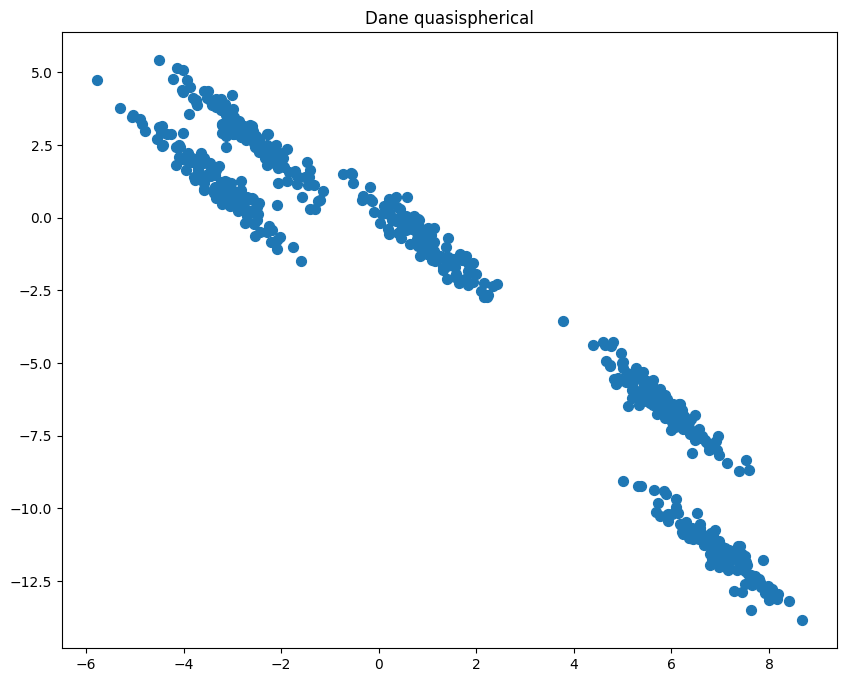

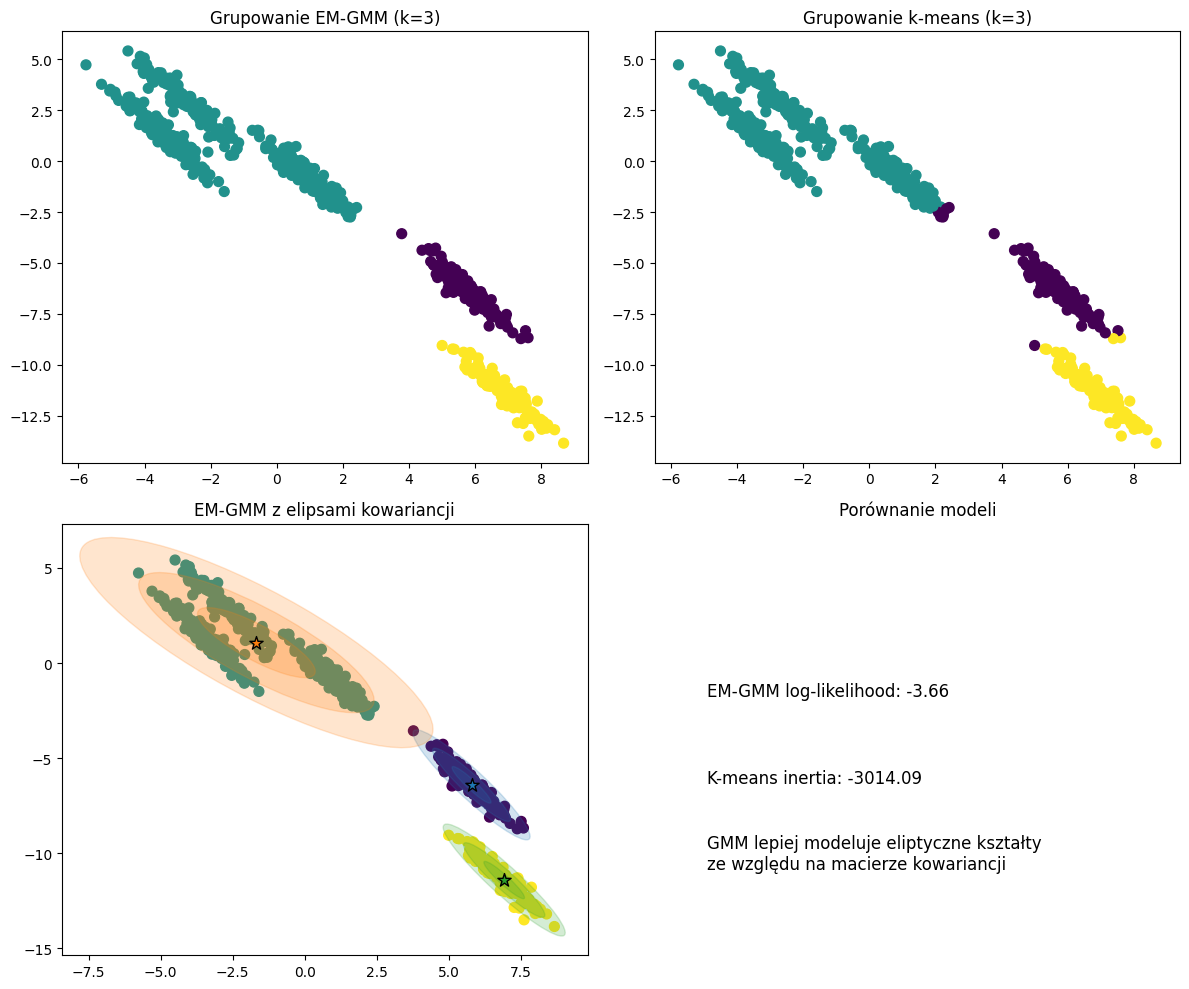

In [16]:
# TODO
from sklearn.mixture import GaussianMixture
from helpers import get_quasispherical_data

# Wczytanie danych quasispherical
X_quasi = get_quasispherical_data()

# Wizualizacja danych
plt.figure(figsize=(10, 8))
plt.title("Dane quasispherical")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], s=50)
plt.show()

# Zastosowanie algorytmu EM-GMM z sklearn
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_quasi)
labels_gmm = gmm.predict(X_quasi)

# Wizualizacja wyników grupowania EM-GMM
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.title("Grupowanie EM-GMM (k=3)")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], c=labels_gmm, s=50, cmap='viridis')

# Dla porównania - grupowanie k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_quasi)
labels_kmeans = kmeans.labels_

plt.subplot(2, 2, 2)
plt.title("Grupowanie k-means (k=3)")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], c=labels_kmeans, s=50, cmap='viridis')

# Wizualizacja elips kowariancji dla EM-GMM
plt.subplot(2, 2, 3)
plt.title("EM-GMM z elipsami kowariancji")

# Funkcja do rysowania elips
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Rysowanie elipsy odpowiadającej zadanej macierzy kowariancji"""
    from matplotlib.patches import Ellipse
    import numpy as np
    
    ax = ax or plt.gca()
    
    # Obliczenie wartości i wektorów własnych macierzy kowariancji
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Narysowanie elipsy
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                            angle=angle, **kwargs))

# Rysowanie punktów danych z kolorami przypisanymi przez GMM
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], c=labels_gmm, s=50, cmap='viridis')

# Rysowanie elips kowariancji dla każdego komponentu GMM
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    draw_ellipse(mean, cov, alpha=0.2, color=f'C{i}')
    plt.scatter(mean[0], mean[1], s=100, marker='*', edgecolors='k', color=f'C{i}')

# Porównanie log-wiarygodności obu modeli
plt.subplot(2, 2, 4)
plt.title("Porównanie modeli")
plt.text(0.1, 0.6, f"EM-GMM log-likelihood: {gmm.score(X_quasi):.2f}", fontsize=12)
plt.text(0.1, 0.4, f"K-means inertia: {-kmeans.inertia_:.2f}", fontsize=12)
plt.text(0.1, 0.2, "GMM lepiej modeluje eliptyczne kształty\nze względu na macierze kowariancji", fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

# Czy EM-GMM lepiej radzi sobie z danymi quasispherical niż k-means?
# Tak, EM-GMM znacznie lepiej radzi sobie z takimi danymi. GMM może modelować eliptyczne skupienia
# o dowolnej orientacji w przestrzeni, ponieważ każdy komponent ma własną macierz kowariancji.
# W przeciwieństwie do k-means, który zakłada jedynie sferyczne skupienia oparte na odległości euklidesowej,
# GMM jest w stanie dopasować się do anizotropowej natury danych poprzez dostosowanie kierunku,
# orientacji i rozmiaru elipsoidy dla każdego komponentu.

Wykonaj proces strojenia parametru $K$ metody EM-GMM poprzez narysowanie wykresu funkcji wiarygodności dla różnych $K$ na zbiorze uczącym i testowym. Sprawdź czy wybrana liczba elementów mikstury odpowiada intuicji.

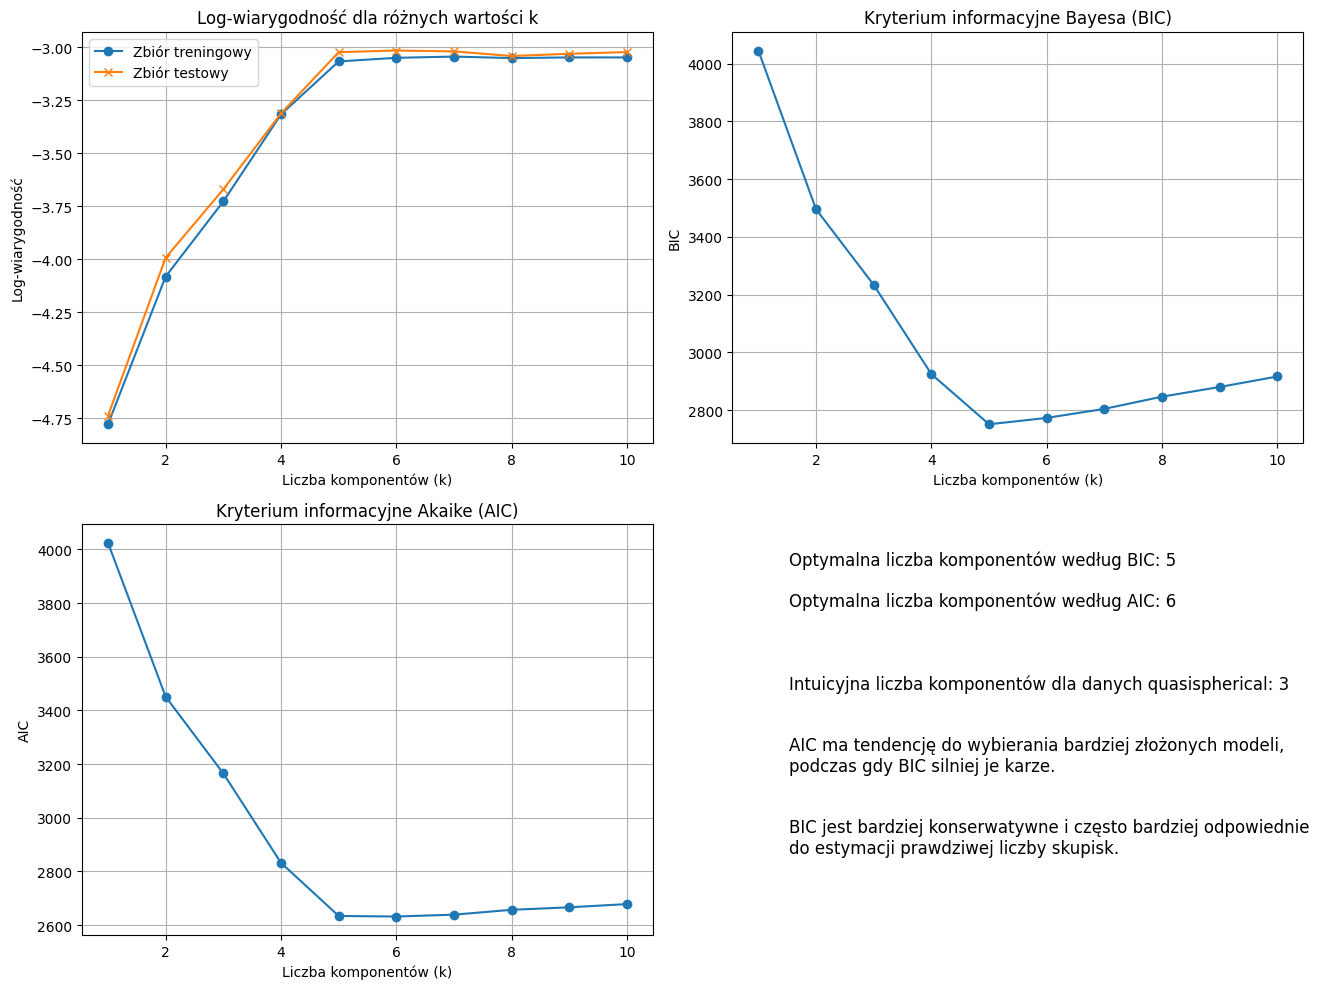

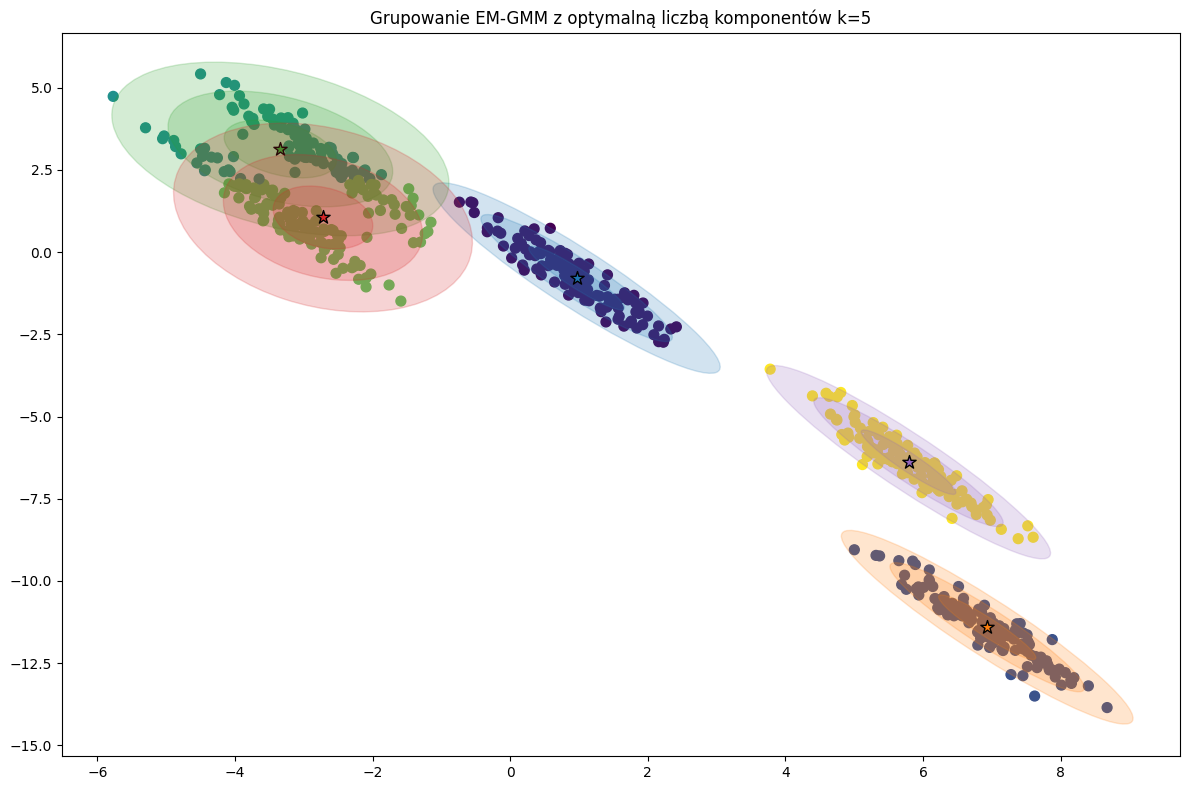

Optymalna liczba komponentów zgodnie z BIC to 5.
Optymalna liczba komponentów zgodnie z AIC to 6.


In [17]:
# TODO
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie danych quasispherical
from helpers import get_quasispherical_data
X_quasi = get_quasispherical_data()

# Podział danych na zbiór treningowy i testowy
X_train, X_test = train_test_split(X_quasi, test_size=0.3, random_state=42)

# Sprawdzenie różnych wartości k
k_values = range(1, 11)
train_scores = []
test_scores = []
bic_scores = []
aic_scores = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train)
    
    # Obliczenie log-wiarygodności na zbiorze treningowym i testowym
    train_scores.append(gmm.score(X_train))
    test_scores.append(gmm.score(X_test))
    
    # Obliczenie BIC i AIC
    bic_scores.append(gmm.bic(X_train))
    aic_scores.append(gmm.aic(X_train))

# Wizualizacja wyników
plt.figure(figsize=(14, 10))

# Wykres log-wiarygodności
plt.subplot(2, 2, 1)
plt.plot(k_values, train_scores, 'o-', label='Zbiór treningowy')
plt.plot(k_values, test_scores, 'x-', label='Zbiór testowy')
plt.xlabel('Liczba komponentów (k)')
plt.ylabel('Log-wiarygodność')
plt.title('Log-wiarygodność dla różnych wartości k')
plt.legend()
plt.grid(True)

# Wykres BIC
plt.subplot(2, 2, 2)
plt.plot(k_values, bic_scores, 'o-')
plt.xlabel('Liczba komponentów (k)')
plt.ylabel('BIC')
plt.title('Kryterium informacyjne Bayesa (BIC)')
plt.grid(True)

# Wykres AIC
plt.subplot(2, 2, 3)
plt.plot(k_values, aic_scores, 'o-')
plt.xlabel('Liczba komponentów (k)')
plt.ylabel('AIC')
plt.title('Kryterium informacyjne Akaike (AIC)')
plt.grid(True)

# Znalezienie optymalnej liczby komponentów na podstawie BIC
optimal_k_bic = k_values[np.argmin(bic_scores)]
optimal_k_aic = k_values[np.argmin(aic_scores)]

# Podsumowanie
plt.subplot(2, 2, 4)
plt.axis('off')
plt.text(0.1, 0.9, f"Optymalna liczba komponentów według BIC: {optimal_k_bic}", fontsize=12)
plt.text(0.1, 0.8, f"Optymalna liczba komponentów według AIC: {optimal_k_aic}", fontsize=12)
plt.text(0.1, 0.6, "Intuicyjna liczba komponentów dla danych quasispherical: 3", fontsize=12)
plt.text(0.1, 0.4, "AIC ma tendencję do wybierania bardziej złożonych modeli,\npodczas gdy BIC silniej je karze.", fontsize=12)
plt.text(0.1, 0.2, "BIC jest bardziej konserwatywne i często bardziej odpowiednie\ndo estymacji prawdziwej liczby skupisk.", fontsize=12)

plt.tight_layout()
plt.show()

# Wizualizacja grupowania dla optymalnej wartości k
optimal_k = optimal_k_bic  # Wybieramy wartość z BIC, która jest bardziej konserwatywna
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_optimal.fit(X_quasi)
labels_optimal = gmm_optimal.predict(X_quasi)

plt.figure(figsize=(12, 8))
plt.title(f"Grupowanie EM-GMM z optymalną liczbą komponentów k={optimal_k}")
plt.scatter(X_quasi[:, 0], X_quasi[:, 1], c=labels_optimal, s=50, cmap='viridis')

# Rysowanie elips kowariancji
for i, (mean, cov) in enumerate(zip(gmm_optimal.means_, gmm_optimal.covariances_)):
    draw_ellipse(mean, cov, alpha=0.2, color=f'C{i}')
    plt.scatter(mean[0], mean[1], s=100, marker='*', edgecolors='k', color=f'C{i}')

plt.tight_layout()
plt.show()

print(f"Optymalna liczba komponentów zgodnie z BIC to {optimal_k_bic}.")
print(f"Optymalna liczba komponentów zgodnie z AIC to {optimal_k_aic}.")

# Na podstawie wizualnej inspekcji danych, intuicyjnie oczekiwalibyśmy 3 komponentów.
# BIC często daje bardziej wiarygodną ocenę prawdziwej liczby komponentów,
# ponieważ silniej karze za zbyt złożone modele w porównaniu do AIC.